In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.font_manager as fm
path =  '/usr/share/fonts/opentype/noto/NotoSansCJK-Bold.ttc'
fontprop = fm.FontProperties(fname=path, size=18).get_name()
matplotlib.rc('font', family=fontprop)

# 실습 1

In [2]:
df = pd.read_csv('/home/piai/빅데이터/1. Big Data 분석 기초/titanic.csv', encoding ='euc-kr')
df.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S

In [3]:
df.shape

(891, 12)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
df.describe(include = 'all')

PassengerId    Survived      Pclass                     Name   Sex  \
count    891.000000  891.000000  891.000000                      891   891   
unique          NaN         NaN         NaN                      891     2   
top             NaN         NaN         NaN  Braund, Mr. Owen Harris  male   
freq            NaN         NaN         NaN                        1   577   
mean     446.000000    0.383838    2.308642                      NaN   NaN   
std      257.353842    0.486592    0.836071                      NaN   NaN   
min        1.000000    0.000000    1.000000                      NaN   NaN   
25%      223.500000    0.000000    2.000000                      NaN   NaN   
50%      446.000000    0.000000    3.000000                      NaN   NaN   
75%      668.500000    1.000000    3.000000                      NaN   NaN   
max      891.000000    1.000000    3.000000                      NaN   NaN   

               Age       SibSp       Parch  Ticket        Fare    Cabin  \
count   891.000000  891.000000  891.000000     891  891.000000      204   
unique         NaN         NaN         NaN     681         NaN      147   
top            NaN         NaN         NaN  347082         NaN  B96 B98   
freq           NaN         NaN         NaN       7         NaN        4   
mean     29.758889    0.523008    0.381594     NaN   32.204208      NaN   
std      13.002570    1.102743    0.806057     NaN   49.693429      NaN   
min       0.420000    0.000000    0.000000     NaN    0.000000      NaN   
25%      22.000000    0.000000    0.000000     NaN    7.910400      NaN   
50%      30.000000    0.000000    0.000000     NaN   14.454200      NaN   
75%      35.000000    1.000000    0.000000     NaN   31.000000      NaN   
max      80.000000    8.000000    6.000000     NaN  512.329200      NaN   

       Embarked  
count       889  
unique        3  
top           S  
freq        644  
mean        NaN  
std         NaN  
min         NaN  
25%         NaN  
50%         NaN  
75%         NaN  
max         NaN

## PassengerId, Survived, Pclass, Age, SibSp, Parch, Fare : 연속, 이산형 변수
## Name, Sex, Ticket, Cabin, Embarked : 범주형 변수

In [6]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [7]:
def fareMapping(fare):
    if fare <= 50:
        return 0
    elif fare <= 100:
        return 1
    elif fare <= 150:
        return 2
    elif fare <= 200:
        return 3
    else:
        return 4
    
df['Fare_dist'] = df['Fare'].apply(fareMapping)

In [8]:
def ageMapping(age):
    if age <= 14:
        return 'Child'
    elif age <= 28:
        return 'Young'
    elif age <= 45:
        return 'Middel'
    elif age <= 56:
        return 'Prime'
    else:
        return 'Old'
df['Age_dist'] = df['Age'].apply(ageMapping)

In [9]:
df['Family'] = df['Parch'] + df['SibSp']

## 결측치 Cabin 687개, Embarked 2개

<AxesSubplot:>

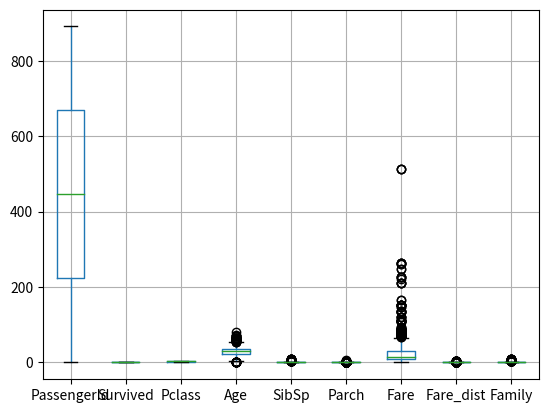

In [10]:
df.boxplot()

<h1>
    티켓 요금이니 Fare는 이상치로 간주 하지 않음
</h1>

## Cabin 컬럼은 다른 컬럼과 연관성이 보이지 않아 Cabin 컬럼 삭제

In [11]:
df.groupby(['Cabin']).describe()

PassengerId                                                          \
            count   mean         std    min     25%    50%     75%    max   
Cabin                                                                       
A10           1.0  584.0         NaN  584.0  584.00  584.0  584.00  584.0   
A14           1.0  476.0         NaN  476.0  476.00  476.0  476.00  476.0   
A16           1.0  557.0         NaN  557.0  557.00  557.0  557.00  557.0   
A19           1.0  285.0         NaN  285.0  285.00  285.0  285.00  285.0   
A20           1.0  600.0         NaN  600.0  600.00  600.0  600.00  600.0   
...           ...    ...         ...    ...     ...    ...     ...    ...   
F33           3.0  310.0  227.149730   67.0  206.50  346.0  431.50  517.0   
F38           1.0  777.0         NaN  777.0  777.00  777.0  777.00  777.0   
F4            2.0  401.5  307.591450  184.0  292.75  401.5  510.25  619.0   
G6            4.0  216.0  158.600126   11.0  157.25  229.0  287.75  395.0   
T             1.0  340.0         NaN  340.0  340.00  340.0  340.00  340.0   

      Survived       ... Fare_dist      Family                             \
         count mean  ...       75%  max  count  mean  std  min   25%  50%   
Cabin                ...                                                    
A10        1.0  0.0  ...       0.0  0.0    1.0  0.00  NaN  0.0  0.00  0.0   
A14        1.0  0.0  ...       1.0  1.0    1.0  0.00  NaN  0.0  0.00  0.0   
A16        1.0  1.0  ...       0.0  0.0    1.0  1.00  NaN  1.0  1.00  1.0   
A19        1.0  0.0  ...       0.0  0.0    1.0  0.00  NaN  0.0  0.00  0.0   
A20        1.0  1.0  ...       1.0  1.0    1.0  1.00  NaN  1.0  1.00  1.0   
...        ...  ...  ...       ...  ...    ...   ...  ...  ...   ...  ...   
F33        3.0  1.0  ...       0.0  0.0    3.0  0.00  0.0  0.0  0.00  0.0   
F38        1.0  0.0  ...       0.0  0.0    1.0  0.00  NaN  0.0  0.00  0.0   
F4         2.0  1.0  ...       0.0  0.0    2.0  3.00  0.0  3.0  3.00  3.0   
G6         4.0  0.5  ...       0.0  0.0    4.0  1.75  0.5  1.0  1.75  2.0   
T          1.0  0.0  ...       0.0  0.0    1.0  0.00  NaN  0.0  0.00  0.0   

                 
       75%  max  
Cabin            
A10    0.0  0.0  
A14    0.0  0.0  
A16    1.0  1.0  
A19    0.0  0.0  
A20    1.0  1.0  
...    ...  ...  
F33    0.0  0.0  
F38    0.0  0.0  
F4     3.0  3.0  
G6     2.0  2.0  
T      0.0  0.0  

[147 rows x 72 columns]

In [12]:
df.drop('Cabin', axis=1, inplace=True)

## Embarked 대체값 찾기

In [13]:
df[df['Embarked'].isnull()]

PassengerId  Survived  Pclass                                       Name  \
61            62         1       1                        Icard, Miss. Amelie   
829          830         1       1  Stone, Mrs. George Nelson (Martha Evelyn)   

        Sex   Age  SibSp  Parch  Ticket  Fare Embarked  Fare_dist Age_dist  \
61   female  38.0      0      0  113572  80.0      NaN          1   Middel   
829  female  62.0      0      0  113572  80.0      NaN          1      Old   

     Family  
61        0  
829       0

In [14]:
df.groupby(['Embarked'])['Fare','Fare_dist'].describe()

/tmp/ipykernel_5747/2385927610.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df.groupby(['Embarked'])['Fare','Fare_dist'].describe()


Fare                                                            \
          count       mean        std     min       25%    50%        75%   
Embarked                                                                    
C         168.0  59.954144  83.912994  4.0125  13.69795  29.70  78.500025   
Q          77.0  13.276030  14.188047  6.7500   7.75000   7.75  15.500000   
S         644.0  27.079812  35.887993  0.0000   8.05000  13.00  27.900000   

                   Fare_dist                                               
               max     count      mean       std  min  25%  50%  75%  max  
Embarked                                                                   
C         512.3292     168.0  0.678571  1.133705  0.0  0.0  0.0  1.0  4.0  
Q          90.0000      77.0  0.025974  0.160101  0.0  0.0  0.0  0.0  1.0  
S         263.0000     644.0  0.223602  0.654927  0.0  0.0  0.0  0.0  4.0

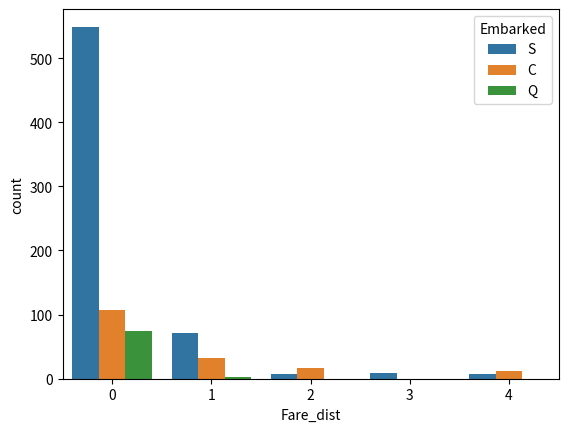

In [15]:
sns.countplot(x='Fare_dist', hue='Embarked', data=df)
plt.show()

## Embarked Fare_dist 1구간 S가 가장 많아 S값으로 대체

In [16]:
df['Embarked'].fillna('S')

0      S
1      C
2      S
3      S
4      S
      ..
886    S
887    S
888    S
889    C
890    Q
Name: Embarked, Length: 891, dtype: object

In [17]:
def draw_plot_categorical(feature_name): 
    fig, [axis0,axis1] = plt.subplots(1,2,figsize=(10,5))
    df[feature_name].value_counts().plot.pie(autopct='%1.1f%%',ax=axis0)
    sns.countplot(x=feature_name, hue='Survived', data=df,ax=axis1)
    plt.show()

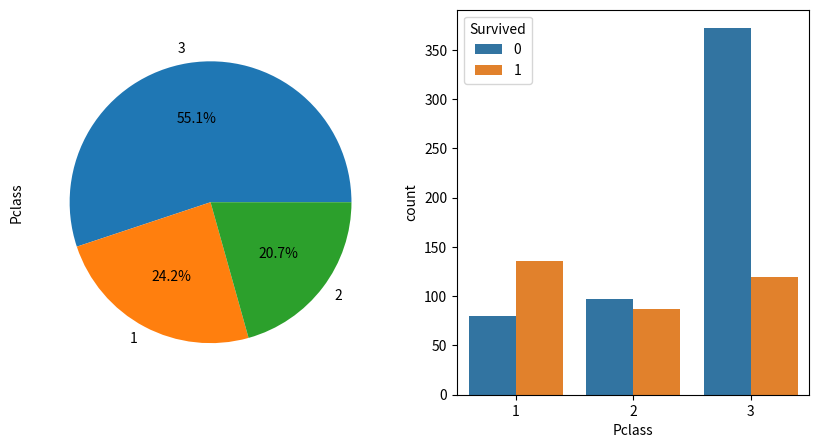

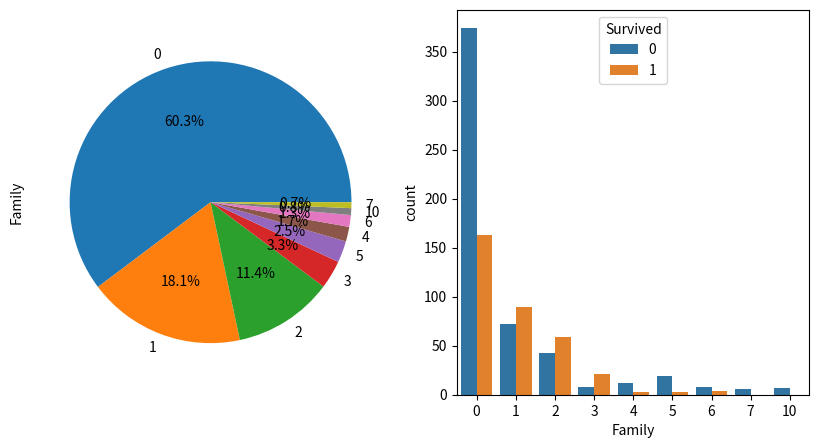

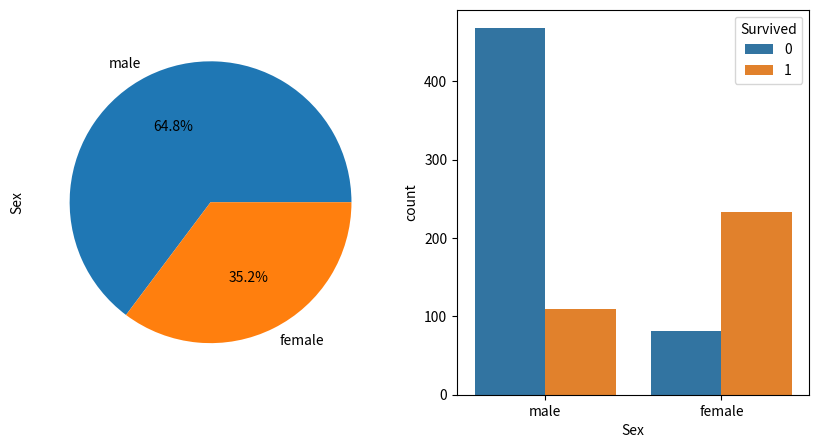

In [18]:
draw_plot_categorical('Pclass')
draw_plot_categorical('Family')
draw_plot_categorical('Fare_dist')
draw_plot_categorical('Sex')
draw_plot_categorical('Age_dist')

In [19]:
##남녀 연령대별 사망 분포 확인
plt.hist(df.loc[(df["Sex"]=="male")&(df["Survived"]==0)]["Age"],label="male",alpha=0.5)
plt.hist(df.loc[(df["Sex"]=="female")&(df["Survived"]==0)]["Age"],label="female",alpha=0.5)
plt.legend()
plt.show()

In [20]:
colormap = plt.cm.viridis
plt.figure(figsize=(12,12))
plt.title('Correlation between Features', y=1.05, size = 15)
sns.heatmap(df.corr(),
            linewidths=0.1, 
            vmax=1.0, 
            square=True, 
            cmap=colormap, 
            linecolor='white', 
            annot=True)

plt.show()

<h1>
Pclass 등급 높을수록 생존 확률이 높다.
    </br>
Family 가족이 있는 사람은 가족이 없는 사람보다 생존 확률이 높다.
    </br>
Fare 요금이 비싸면 생존 확률이 높다.
    </br>
Sex 남여간 생존 확률 차이가 존재한다.
    </br>
Age 아이들이 생존 확률이 높다.(20~30대 생존 확률이 가장 낮다.)
    </br>
Survived, Pclass는 상관관계가 비교적 높다

# 실습 2

In [21]:
ds_mycars = pd.read_csv("/home/piai/빅데이터/1. Big Data 분석 기초/mycars.csv")
ds_mycars.head()

manufacturer model  displacement  year  cylinder automatic driving  mpg  \
0         audi    a4           1.8  1999         4      auto       f   18   
1         audi    a4           1.8  1999         4    manual       f   21   
2         audi    a4           2.0  2008         4    manual       f   20   
3         audi    a4           2.0  2008         4      auto       f   21   
4         audi    a4           2.8  1999         6      auto       f   16   

   highway_mileage fuel    class  
0               29    p  compact  
1               29    p  compact  
2               31    p  compact  
3               30    p  compact  
4               26    p  compact

In [22]:
df = ds_mycars[['automatic','mpg']]
df.groupby('automatic').describe()

mpg                                                  
           count       mean       std  min   25%   50%   75%   max
automatic                                                         
auto       157.0  15.968153  3.848777  9.0  13.0  16.0  18.0  29.0
manual      77.0  18.675325  4.488118  9.0  15.0  18.0  21.0  35.0

In [23]:
df = ds_mycars[['automatic','highway_mileage']]
df.groupby('automatic').describe()

highway_mileage                                                   
                    count       mean       std   min   25%   50%   75%   max
automatic                                                                   
auto                157.0  22.292994  5.623054  12.0  17.0  22.0  26.0  41.0
manual               77.0  25.779221  5.961772  12.0  23.0  26.0  29.0  44.0

<h1>
    연비는 시내, 고속도로 둘 다 manual 구동 방식이 auto 구동 방식보다 평균, 중위수 둘 다 높다.
</h1>

In [24]:
from scipy import stats
from statsmodels.stats.proportion import proportions_ztest

In [25]:
x = 180
mu = 175
sd = 5
prob = stats.norm.cdf(x,mu,sd)
print('평균이 175, 표준편차 5일 때, 나의 키가 180cm 일 경우에는 {:.1F}% 범위에 위치한다.'.format(prob*100))

평균이 175, 표준편차 5일 때, 나의 키가 180cm 일 경우에는 84.1% 범위에 위치한다.


# 실습

In [26]:
x1 = 9
x2 = 15
mu = 12
sd = 3

prob9 = stats.norm.cdf(x1, mu, sd)
prob15 = stats.norm.cdf(x2, mu, sd)

print('평균이 12, 표준편차가 3일 때 ,1리터를 가지고 9km 이상 15km이하를 달릴 확률은 {:.3f}'.format(prob15 - prob9))
print('평균이 12, 표준편차가 3일 때 ,1리터를 가지고 15km 이상 달릴 확률은 {:.3f}'.format(1-prob15))

평균이 12, 표준편차가 3일 때 ,1리터를 가지고 9km 이상 15km이하를 달릴 확률은 0.683
평균이 12, 표준편차가 3일 때 ,1리터를 가지고 15km 이상 달릴 확률은 0.159


# 실습

In [27]:
t = 2.0
df = 100

prob = stats.t.cdf(t, df)
print('표본이 101개이고, t값이 2.0 일 때, P(T <= t)은? {:.3f}'.format(prob))

표본이 101개이고, t값이 2.0 일 때, P(T <= t)은? 0.976


# 실습


In [28]:
chisq = 3.0
df = 8

prob = stats.chi2.cdf(chisq,df)
print('표본이 9개이고, 카이제곱 값이 3.0 일 때, P(X <= x^2)은? {:.3f}'.format(prob))

표본이 9개이고, 카이제곱 값이 3.0 일 때, P(X <= x^2)은? 0.066


# 실습

In [29]:
f = 1.5
dfnum = 10
dfden = 100

prob = stats.f.cdf(f, dfnum, dfden)
print('확률분포 F는 각각 자유도가 10, 100인 F-분포를 따른다. F값이 1.5일때 P (X <= F)은? {:.3f}'.format(prob))

확률분포 F는 각각 자유도가 10, 100인 F-분포를 따른다. F값이 1.5일때 P (X <= F)은? 0.850
